# Import libraries

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import sys
from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Simulated annealing

In [204]:
# define a residue calculating function - min Euclidean distance
def residue(sol) :
    min_res = sys.float_info.max
    for item in sol :
        for other in sol :
            pair_dist = 0.0
            for i in range(len(item)) :
                pair_dist += (other[i] - item[i])**2
            if math.sqrt(pair_dist) < min_res :
                min_res = math.sqrt(pair_dist)
    return min_res

# define a "cooling function"
def cooling_fct(iter) :
    return 10**10 * (0.8)**(math.floor(iter/300))
    

# simulated annealing 
def sim_annealing(array, k, dims) :
    # start with a random solution
    indices = np.ndarray(shape = (k, 1), dtype = float)
    coords = np.ndarray(shape = (k, dims), dtype = float)
    for i in range(k) :
        index = random.randint(0, len(array)-1)
        indices[i] = index
        coords[i] = array[index]
    # record a "best solution"
    indices_best = indices[:]
    coords_best = coords[:]
    # iterate 
    for i in range(1000) :
        # generate a new neighbor
        indices_temp = indices[:]
        coords_temp = coords[:]
        change_at = random.randint(0, k-1)
        change_to = random.randint(0, len(array)-1)
        while change_to in indices_temp :
            change_to = random.randint(0, len(array)-1)
        indices_temp[change_at] = change_to
        coords_temp[change_at] = array[change_to]
        old_res = residue(coords)
        new_res = residue(coords_temp)
        if new_res < old_res :
            indices = indices_temp[:]
            coords = coords_temp[:]
        else :
            proba = math.exp(- (new_res - old_res) / cooling_fct(i))
            decision = np.random.binomial(1, proba)
            if decision == 1 :
                indices = indices_temp[:]
                coords = coords_temp[:]
        if old_res < residue(coords_best) :
            indices_best = indices[:]
            coords_best = coords[:]
    return coords_best

# k-means main code

Code bits for k means implementation taken from the following stack overflow post :
https://stackoverflow.com/questions/52752836/organizing-clusters-in-k-means-clustering 

In [211]:
def k_means( density, convex_hull_comp, volume, title, k, with_sa, infile ) :
    random.seed(datetime.now())

    # identify desired information :
    dimensions = 0;
    if (density) : 
        dimensions += 1;
    if (convex_hull_comp) : 
        dimensions += 1;
    if (volume) : 
        dimensions += 1;
    data = np.ndarray(shape = (114, dimensions), dtype = float)
    temp = np.ndarray(shape = (1, dimensions), dtype = float)
    
    # record protein data
    counter = 0
    for line in open(infile):
        line   = line.rstrip('\n')      
        fields = line.split()
        if (dimensions == 2 and density) :
            if (convex_hull_comp) :
                data[counter] = np.array((float(fields[0]), float(fields[1])))
            else :
                data[counter] = np.array((float(fields[0]), float(fields[2])))
        elif (dimensions == 2) :
            data[counter] = np.array((float(fields[1]), float(fields[2])))
        else :
            data[counter] = np.array((float(fields[0]), float(fields[1]), float(fields[2])))
        counter += 1

    # reduce data if want all 3 dimensions
    n_samples, n_features = data.shape
    n_digits = len(np.unique(digits.target))
    labels = digits.target
    h = .02
    reduced_data = data
    if (dimensions == 3) :
        reduced_data = PCA(n_components = 2).fit_transform(data)
    kmeans = KMeans(init='k-means++', n_clusters = k, n_init = 100)
    kmeans.fit(reduced_data)
    
    # calculate initial centroids
    centroids = np.ndarray(shape = (k, dimensions), dtype = float)
    if with_sa :
        centroids = sim_annealing(data, k, dimensions)
    else :
        centroids = kmeans.cluster_centers_
    
    # plot the results
    plt_data = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap=plt.cm.get_cmap('viridis', k))
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    labels = ['{0}'.format(i) for i in range(k)]
    for i in range (k):
        xy=(centroids[i, 0],centroids[i, 1])
        plt.annotate(labels[i],xy, horizontalalignment='right', verticalalignment='top')
    plt.show()

# Driver code for visualizing clusters

Without simulated annealing :
    k = 3


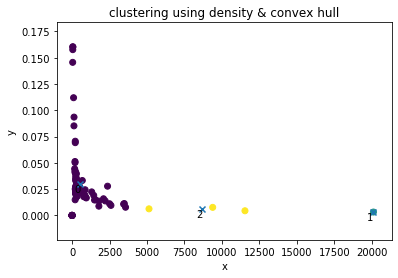

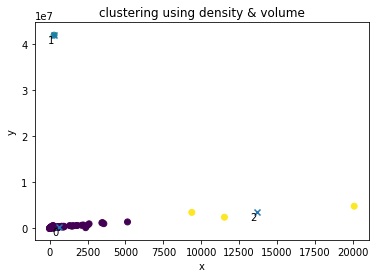

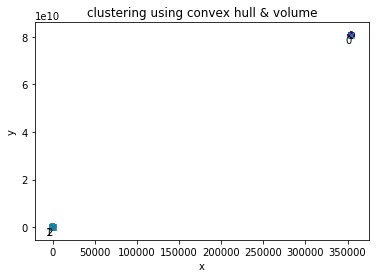

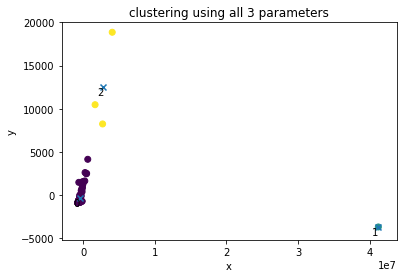

    k = 4


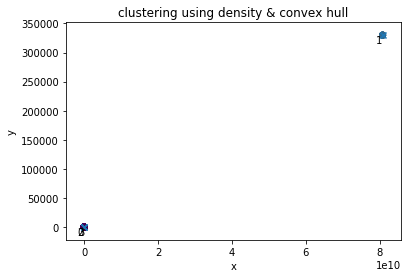

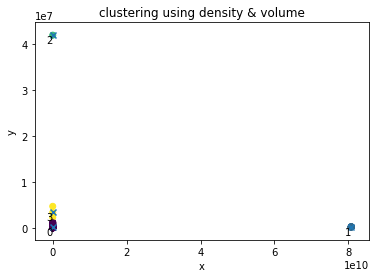

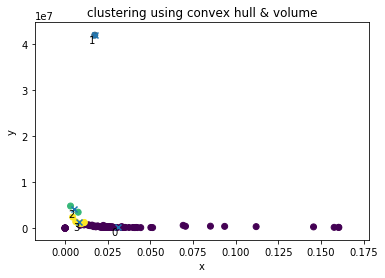

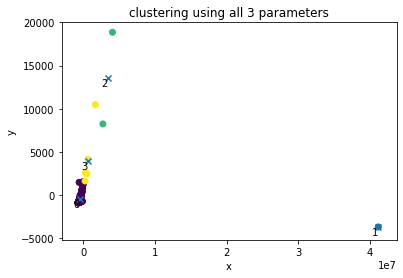

    k = 3


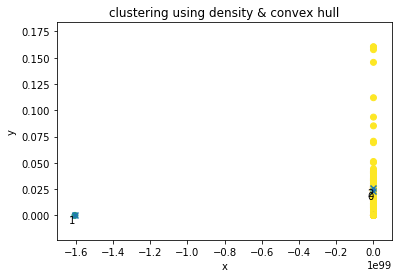

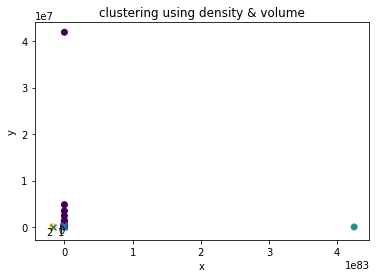

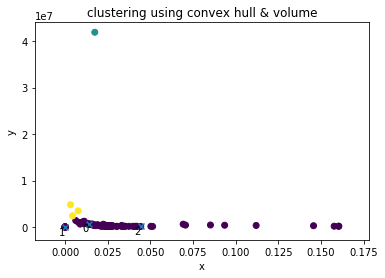

/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/decomposition/pca.py:445: RuntimeWarning: overflow encountered in square
  explained_variance_ = (S ** 2) / (n_samples - 1)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/decomposition/pca.py:447: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning

/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:445: RuntimeWarning: overflow encountered in square
  max_iter=max_iter, verbose=verbose)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:445: RuntimeWarning: invalid value encountered in subtract
  max_iter=max_iter, verbose=verbose)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += 

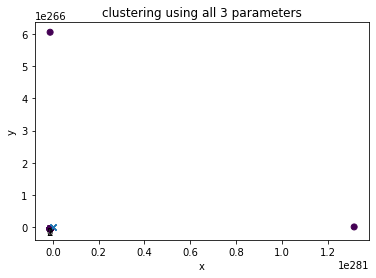

    k = 4


/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/

/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:445: RuntimeWarning: overflow encountered in square
  max_iter=max_iter, verbose=verbose)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:445: RuntimeWarning: invalid value encountered in subtract
  max_iter=max_iter, verbose=verbose)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += 

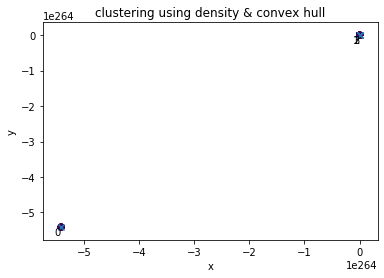

/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/

/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:445: RuntimeWarning: overflow encountered in square
  max_iter=max_iter, verbose=verbose)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:445: RuntimeWarning: invalid value encountered in subtract
  max_iter=max_iter, verbose=verbose)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += 

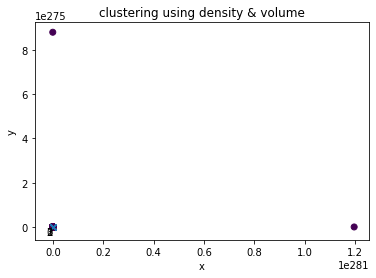

/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/

/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:447: RuntimeWarning: overflow encountered in square
  inertia = np.sum((X - centers[labels]) ** 2, dtype=np.float64)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances +

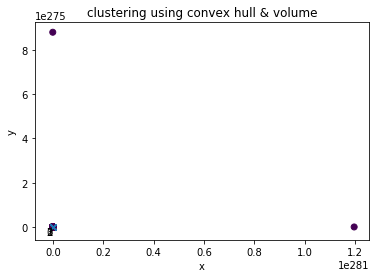

/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/decomposition/pca.py:445: RuntimeWarning: overflow encountered in square
  explained_variance_ = (S ** 2) / (n_samples - 1)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/decomposition/pca.py:447: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning

/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:445: RuntimeWarning: overflow encountered in square
  max_iter=max_iter, verbose=verbose)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:445: RuntimeWarning: invalid value encountered in subtract
  max_iter=max_iter, verbose=verbose)
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
/Users/mariaguramare/miniconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += 

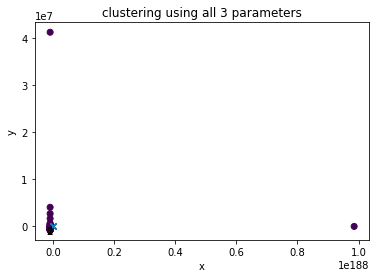

Without simulated annealing :
    k = 3


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [213]:
density = True
convex_hull_comp = True
volume = True
original_data = 'prot_data/datafile.txt'
cleaned_data = 'prot_data/datafile_clean.txt'
with_sa = True


# Calls on original data :

#     Without simulated annealing :
print('Without simulated annealing :')
#         k = 3 clusters
print('    k = 3')
k = 3
k_means(density, convex_hull_comp, not volume, 'clustering using density & convex hull', k, not with_sa, original_data)
k_means(density, not convex_hull_comp, volume, 'clustering using density & volume', k, not with_sa, original_data)
k_means(not density, convex_hull_comp, volume, 'clustering using convex hull & volume', k, not with_sa, original_data)
k_means(density, convex_hull_comp, volume, 'clustering using all 3 parameters', k, not with_sa, original_data)
#         k = 4 clusters
print('    k = 4')
k = 4
k_means(density, convex_hull_comp, not volume, 'clustering using density & convex hull', k, not with_sa, original_data)
k_means(density, not convex_hull_comp, volume, 'clustering using density & volume', k, not with_sa, original_data)
k_means(not density, convex_hull_comp, volume, 'clustering using convex hull & volume', k, not with_sa, original_data)
k_means(density, convex_hull_comp, volume, 'clustering using all 3 parameters', k, not with_sa, original_data)

#     With simulated annealing :
#         k = 3 clusters
print('    k = 3')
k = 3
k_means(density, convex_hull_comp, not volume, 'clustering using density & convex hull', k, with_sa, original_data)
k_means(density, not convex_hull_comp, volume, 'clustering using density & volume', k, with_sa, original_data)
k_means(not density, convex_hull_comp, volume, 'clustering using convex hull & volume', k, with_sa, original_data)
k_means(density, convex_hull_comp, volume, 'clustering using all 3 parameters', k, with_sa, original_data)
#         k = 4 clusters
print('    k = 4')
k = 4
k_means(density, convex_hull_comp, not volume, 'clustering using density & convex hull', k, with_sa, original_data)
k_means(density, not convex_hull_comp, volume, 'clustering using density & volume', k, with_sa, original_data)
k_means(not density, convex_hull_comp, volume, 'clustering using convex hull & volume', k, with_sa, original_data)
k_means(density, convex_hull_comp, volume, 'clustering using all 3 parameters', k, with_sa, original_data)


# Calls on data without outliers :
print('Without simulated annealing :')
#         k = 3 clusters
print('    k = 3')
k = 3
k_means(density, convex_hull_comp, not volume, 'clustering using density & convex hull', k, not with_sa, cleaned_data)
k_means(density, not convex_hull_comp, volume, 'clustering using density & volume', k, not with_sa, cleaned_data)
k_means(not density, convex_hull_comp, volume, 'clustering using convex hull & volume', k, not with_sa, cleaned_data)
k_means(density, convex_hull_comp, volume, 'clustering using all 3 parameters', k, not with_sa, cleaned_data)
#         k = 4 clusters
print('    k = 4')
k = 4
k_means(density, convex_hull_comp, not volume, 'clustering using density & convex hull', k, not with_sa, cleaned_data)
k_means(density, not convex_hull_comp, volume, 'clustering using density & volume', k, not with_sa, cleaned_data)
k_means(not density, convex_hull_comp, volume, 'clustering using convex hull & volume', k, not with_sa, cleaned_data)
k_means(density, convex_hull_comp, volume, 'clustering using all 3 parameters', k, not with_sa, cleaned_data)

#     With simulated annealing :
#         k = 3 clusters
print('    k = 3')
k = 3
k_means(density, convex_hull_comp, not volume, 'clustering using density & convex hull', k, with_sa, cleaned_data)
k_means(density, not convex_hull_comp, volume, 'clustering using density & volume', k, with_sa, cleaned_data)
k_means(not density, convex_hull_comp, volume, 'clustering using convex hull & volume', k, with_sa, cleaned_data)
k_means(density, convex_hull_comp, volume, 'clustering using all 3 parameters', k, with_sa, cleaned_data)
#         k = 4 clusters
print('    k = 4')
k = 4
k_means(density, convex_hull_comp, not volume, 'clustering using density & convex hull', k, with_sa, cleaned_data)
k_means(density, not convex_hull_comp, volume, 'clustering using density & volume', k, with_sa, cleaned_data)
k_means(not density, convex_hull_comp, volume, 'clustering using convex hull & volume', k, with_sa, cleaned_data)
k_means(density, convex_hull_comp, volume, 'clustering using all 3 parameters', k, with_sa, cleaned_data)